In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
pd.set_option("display.max_columns", 100)

In [3]:
comments_path = 'data/comments_-32182751.pkl'
users_path = 'data/users_-32182751.pkl'

In [4]:
with open(comments_path, 'rb') as f:
    comments = pickle.load(f)
with open(users_path, 'rb') as f:
    users = pickle.load(f)

In [5]:
comments_df = pd.DataFrame(comments)

In [10]:
comments_df.head()

,attachments,comment_id,date,from_id,likes,owner_id,reply_to_cid,reply_to_uid,text
0,None,3549599,1481123570,68097867,0,-32182751,None,None,#Участвую
1,None,3549600,1481123577,68097867,1,-32182751,None,None,Первый
2,None,3549607,1481123661,5274672,1,-32182751,None,None,с наступающим!
3,None,3549608,1481123704,168527298,0,-32182751,None,None,Участвую!
4,None,3549609,1481123717,228730455,0,-32182751,None,None,#Участвую


In [11]:
comments_df.shape

(1837500, 9)

# Preparing data

In [12]:
def university_cond(user):
    return len(user.get('universities', [])) == 1

In [13]:
def faculty_cond(user):
    return user['universities'][0].get('faculty_name') is not None

In [14]:
users_with_univ = list(filter(university_cond, users))
users_with_fac = list(filter(faculty_cond, users_with_univ))

In [15]:
len(users_with_univ), len(users_with_fac)

(11363, 8920)

In [12]:
users_with_fac[3]

{'activities': '',
 'bdate': '13.4.1983',
 'books': '',
 'can_see_all_posts': 1,
 'can_see_audio': 1,
 'can_write_private_message': 1,
 'first_name': 'Alexey',
 'id': 14418064,
 'interests': '',
 'last_name': 'Ozornov',
 'movies': '',
 'music': '',
 'occupation': {'id': 6688,
  'name': 'УрТИСИ (филиал) СибГУТИ',
  'type': 'university'},
 'relation': 1,
 'sex': 2,
 'status': '',
 'universities': [{'chair': 43297,
   'chair_name': 'Отделение сокращенной подготовки',
   'city': 49,
   'country': 1,
   'education_form': 'Full-time',
   'education_status': "Alumnus (Master's)",
   'faculty': 37122,
   'faculty_name': 'Факультет сокращенной подготовки',
   'graduation': 2006,
   'id': 6688,
   'name': 'УрТИСИ (филиал) СибГУТИ'}]}

In [13]:
users_with_fac[0]

{'activities': '',
 'bdate': '21.10',
 'books': '',
 'can_see_all_posts': 0,
 'can_see_audio': 1,
 'can_write_private_message': 1,
 'first_name': 'Ivan',
 'id': 25165865,
 'interests': '',
 'last_name': 'Loginovskikh',
 'movies': '',
 'music': '',
 'occupation': {'id': 482, 'name': 'ГУ', 'type': 'university'},
 'relation': 0,
 'sex': 2,
 'status': '',
 'universities': [{'city': 49,
   'country': 1,
   'faculty': 24481,
   'faculty_name': 'Факультет телерадиожурналистики',
   'id': 482,
   'name': 'ГУ\r\n'}]}

In [16]:
users_ = []
for u in users_with_fac:
    u.pop('occupation', None)
    u.pop('relation_partner', None)
    try:
        univ = u.pop('universities')[0]
    except:
        univ = None
    u.update({'univ_name': univ['name'], 'faculty_name': univ['faculty_name'],
              'education_form': univ.get('education_form'), 'education_status': univ.get('education_status'),
              'graduation': univ.get('graduation')})
    
    pers = u.pop('personal', None)
    if pers:
        u.update({'political': pers.get('political'), 'langs': ','.join(pers.get('langs', [])),
                  'religion': pers.get('religion'), 'inspired_by': pers.get('inspired_by'),
                  'people_main': pers.get('people_main'), 'life_main': pers.get('life_main'),
                  'smoking': pers.get('smoking'), 'alcohol': pers.get('alcohol')})
    users_.append(u)

In [17]:
users_[0]

{'activities': '',
 'bdate': '21.10',
 'books': '',
 'can_see_all_posts': 0,
 'can_see_audio': 1,
 'can_write_private_message': 1,
 'education_form': None,
 'education_status': None,
 'faculty_name': 'Факультет телерадиожурналистики',
 'first_name': 'Ivan',
 'graduation': None,
 'id': 25165865,
 'interests': '',
 'last_name': 'Loginovskikh',
 'movies': '',
 'music': '',
 'relation': 0,
 'sex': 2,
 'status': '',
 'univ_name': 'ГУ\r\n'}

In [18]:
users_df = pd.DataFrame(users_)

In [30]:
with open('meta_data/ekb_fac.txt', 'w') as f:
    f.writelines('\n'.join(users_df.faculty_name.value_counts()[(users_df.faculty_name.value_counts() > 5)].keys().values))

In [28]:
(users_df.faculty_name.value_counts() > 5).sum()

192

In [29]:
users_df.faculty_name.value_counts()[(users_df.faculty_name.value_counts() > 5)].values.sum()

7459

In [19]:
ing, gum = [], []
with open('meta_data/ekb_fac_.txt', 'r') as f:
    for line in f.readlines():
        if len(line) > 1:
            line = line.strip()
            if line[-1] == '0':
                ing.append(line[:-2])
            elif line[-1] == '1':
                gum.append(line[:-2])

In [20]:
ing[:3], gum[:3]

(['Механико-машиностроительный институт',
  'Институт радиоэлектроники и информационных технологий (ИРИТ-РтФ)',
  'Строительный институт (СтИ)'],
 ['Высшая школа экономики и менеджмента',
  'Институт гуманитарного и социально-экономического образования',
  'Юридический факультет'])

In [21]:
users_df['is_gum'] = None

In [22]:
def get_is_gum(name):
    name = name.strip()
    if name in gum:
        return 1
    elif name in ing:
        return 0
    else: return None

In [23]:
users_df.is_gum = users_df.faculty_name.apply(get_is_gum)

In [24]:
users_df.dropna(subset=['is_gum'], inplace=True)

In [25]:
users_df.is_gum.value_counts()

1.0    4323
0.0    2317
Name: is_gum, dtype: int64

In [26]:
users_df.columns

Index(['activities', 'alcohol', 'bdate', 'books', 'can_see_all_posts',
       'can_see_audio', 'can_write_private_message', 'education_form',
       'education_status', 'faculty_name', 'first_name', 'graduation', 'id',
       'inspired_by', 'interests', 'langs', 'last_name', 'life_main', 'movies',
       'music', 'people_main', 'political', 'relation', 'religion', 'sex',
       'smoking', 'status', 'status_audio', 'univ_name', 'is_gum'],
      dtype='object')

# Demographic

## Sex

In [27]:
users_vc = users_df.is_gum.value_counts()
users_vc

1.0    4323
0.0    2317
Name: is_gum, dtype: int64

In [28]:
delta = users_vc[1] - users_vc[0]
delta

2006

In [29]:
index_to_del = np.random.choice(users_df[users_df.is_gum == 1].index, delta, replace=False)

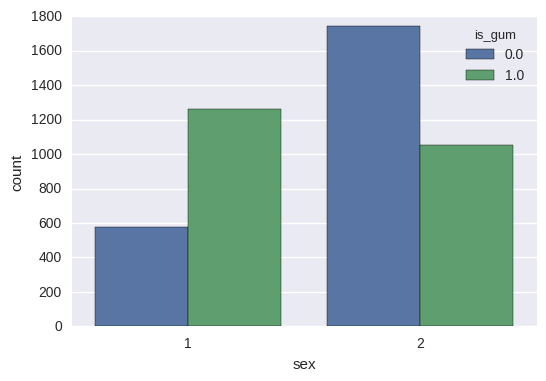

In [30]:
g = sns.countplot(x='sex', hue='is_gum',  data=users_df.drop(index_to_del))

## Alcohol

In [31]:
alcohol_df = users_df.dropna(subset=['alcohol'])
alcohol_vc = alcohol_df.is_gum.value_counts()
alcohol_vc

1.0    1689
0.0     964
Name: is_gum, dtype: int64

In [32]:
delta = alcohol_vc[1] - alcohol_vc[0]
delta

725

In [33]:
index_to_del = np.random.choice(alcohol_df[alcohol_df.is_gum == 1].index, delta, replace=False)
alcohol_df.drop(index_to_del, inplace=True)
alcohol_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0.0    964
1.0    964
Name: is_gum, dtype: int64

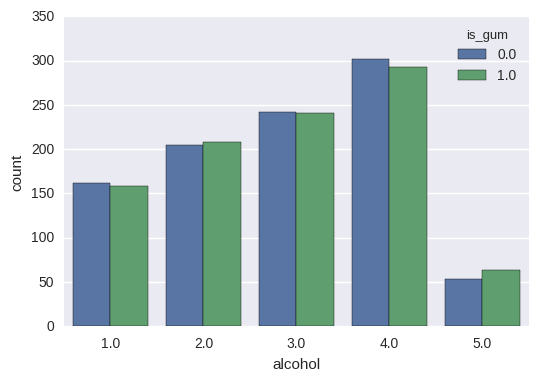

In [34]:
g = sns.countplot(x='alcohol', hue='is_gum',  data=alcohol_df)

## Smoking

In [35]:
smoking_df = users_df.dropna(subset=['smoking'])
smoking_vc = smoking_df.is_gum.value_counts()
smoking_vc

1.0    1743
0.0     989
Name: is_gum, dtype: int64

In [36]:
delta = smoking_vc[1] - smoking_vc[0]
delta

754

In [37]:
index_to_del = np.random.choice(smoking_df[smoking_df.is_gum == 1].index, delta, replace=False)
smoking_df.drop(index_to_del, inplace=True)
smoking_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0.0    989
1.0    989
Name: is_gum, dtype: int64

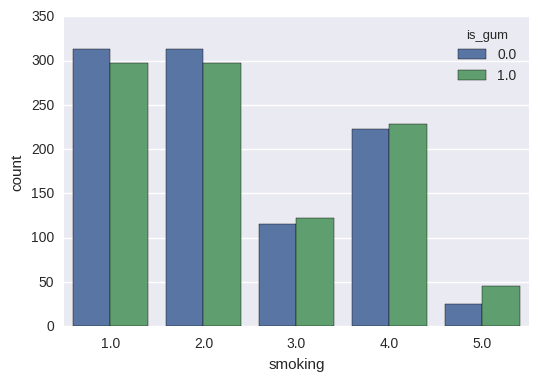

In [38]:
g = sns.countplot(x='smoking', hue='is_gum',  data=smoking_df)

## Political

In [39]:
political_df = users_df.dropna(subset=['political'])
political_vc = political_df.is_gum.value_counts()
political_vc

1.0    1552
0.0     856
Name: is_gum, dtype: int64

In [40]:
delta = political_vc[1] - political_vc[0]
delta

696

In [41]:
index_to_del = np.random.choice(political_df[political_df.is_gum == 1].index, delta, replace=False)
political_df.drop(index_to_del, inplace=True)
political_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0.0    856
1.0    856
Name: is_gum, dtype: int64

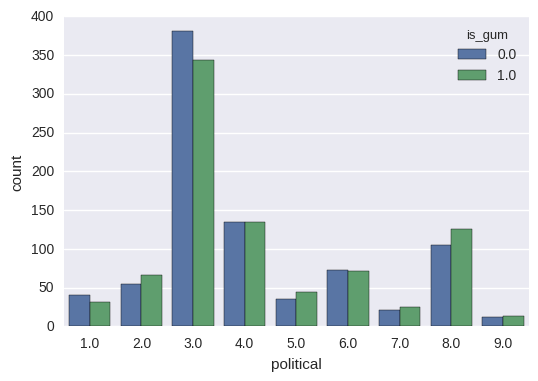

In [42]:
g = sns.countplot(x='political', hue='is_gum',  data=political_df)

## Relation

In [43]:
relation_df = users_df.dropna(subset=['relation'])
relation_vc = relation_df.is_gum.value_counts()
relation_vc

1.0    4323
0.0    2317
Name: is_gum, dtype: int64

In [44]:
delta = relation_vc[1] - relation_vc[0]
delta

2006

In [45]:
index_to_del = np.random.choice(relation_df[relation_df.is_gum == 1].index, delta, replace=False)
relation_df.drop(index_to_del, inplace=True)
relation_df.is_gum.value_counts()

0.0    2317
1.0    2317
Name: is_gum, dtype: int64

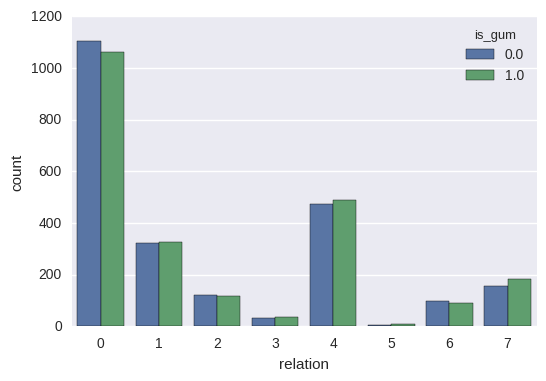

In [46]:
g = sns.countplot(x='relation', hue='is_gum',  data=relation_df)

## Life-main

In [47]:
life_main_df = users_df.dropna(subset=['life_main'])
life_main_vc = life_main_df.is_gum.value_counts()
life_main_vc

1.0    1733
0.0     871
Name: is_gum, dtype: int64

In [48]:
delta = life_main_vc[1] - life_main_vc[0]
delta

862

In [49]:
index_to_del = np.random.choice(life_main_df[life_main_df.is_gum == 1].index, delta, replace=False)
life_main_df.drop(index_to_del, inplace=True)
life_main_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0.0    871
1.0    871
Name: is_gum, dtype: int64

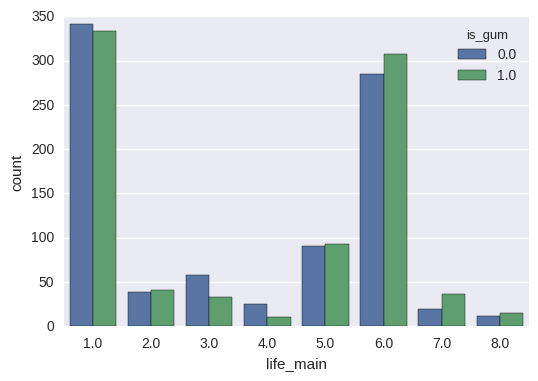

In [50]:
g = sns.countplot(x='life_main', hue='is_gum',  data=life_main_df)

## People-main

In [51]:
people_main_df = users_df.dropna(subset=['people_main'])
people_main_vc = people_main_df.is_gum.value_counts()
people_main_vc

1.0    1766
0.0     921
Name: is_gum, dtype: int64

In [52]:
delta = people_main_vc[1] - people_main_vc[0]
delta

845

In [53]:
index_to_del = np.random.choice(people_main_df[people_main_df.is_gum == 1].index, delta, replace=False)
people_main_df.drop(index_to_del, inplace=True)
people_main_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1.0    921
0.0    921
Name: is_gum, dtype: int64

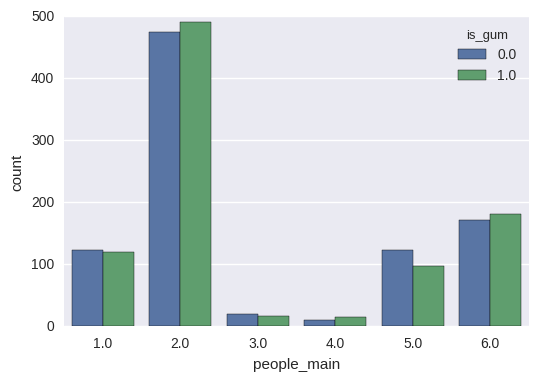

In [54]:
g = sns.countplot(x='people_main', hue='is_gum',  data=people_main_df)

## Month

In [55]:
users_df.bdate = pd.to_datetime(users_df.bdate, errors='coerce')

In [56]:
bdate_df = users_df.dropna(subset=['bdate'])

In [57]:
bdate_vc = bdate_df.is_gum.value_counts()
bdate_vc

1.0    2381
0.0    1320
Name: is_gum, dtype: int64

In [58]:
delta = bdate_vc[1] - bdate_vc[0]
delta

1061

In [59]:
index_to_del = np.random.choice(bdate_df[bdate_df.is_gum == 1].index, delta, replace=False)
index_to_del.shape

(1061,)

In [60]:
bdate_df.drop(index_to_del, inplace=True)
bdate_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0.0    1320
1.0    1320
Name: is_gum, dtype: int64

In [61]:
bdate_df['bmonth'] = bdate_df.bdate.apply(lambda x: x.month if x else x)

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


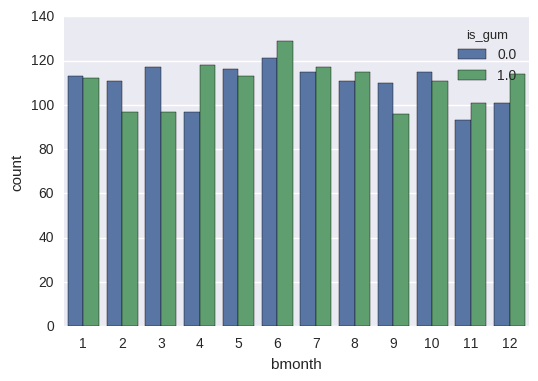

In [62]:
g = sns.countplot(x='bmonth', hue='is_gum',  data=bdate_df)

# Comments

In [63]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1837500 entries, 0 to 1837499
Data columns (total 9 columns):
attachments     object
comment_id      int64
date            int64
from_id         int64
likes           int64
owner_id        object
reply_to_cid    object
reply_to_uid    object
text            object
dtypes: int64(4), object(5)
memory usage: 126.2+ MB


In [64]:
comments_merged = comments_df.merge(users_df[['id', 'is_gum', 'sex']], left_on='from_id', right_on='id', how='inner')

### Generating hour from comment date

In [65]:
comments_merged['hour'] = comments_merged.date.apply(lambda x: datetime.fromtimestamp(x).hour)

In [66]:
comments_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103018 entries, 0 to 103017
Data columns (total 13 columns):
attachments     6006 non-null object
comment_id      103018 non-null int64
date            103018 non-null int64
from_id         103018 non-null int64
likes           103018 non-null int64
owner_id        103018 non-null object
reply_to_cid    0 non-null object
reply_to_uid    0 non-null object
text            103018 non-null object
id              103018 non-null int64
is_gum          103018 non-null float64
sex             103018 non-null int64
hour            103018 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 11.0+ MB


In [67]:
comments_merged.head()

,attachments,comment_id,date,from_id,likes,owner_id,reply_to_cid,reply_to_uid,text,id,is_gum,sex,hour
0,None,3549607,1481123661,5274672,1,-32182751,None,None,с наступающим!,5274672,0.0,1,18
1,"[{'type': 'video', 'video': {'can_add': 1, 'ph...",3180116,1465277266,5274672,0,-32182751,None,None,"А-ха-ха, как мило!!!",5274672,0.0,1,8
2,"[{'type': 'audio', 'audio': {'genre_id': 2, 'l...",3132872,1463130124,5274672,1,-32182751,None,None,,5274672,0.0,1,12
3,None,3098962,1461608976,5274672,0,-32182751,None,None,"Зная как сейчас строят, рано или поздно она на...",5274672,0.0,1,21
4,"[{'type': 'audio', 'audio': {'genre_id': 18, '...",3088169,1461129330,5274672,1,-32182751,None,None,напоминает песню...,5274672,0.0,1,8


In [68]:
comments_merged.sex.value_counts()

2    67580
1    35438
Name: sex, dtype: int64

## Nice plot

In [69]:
comments_merged['Гумманитарий'] = comments_merged.is_gum

In [70]:
comments_merged.Гумманитарий = comments_merged.Гумманитарий.map({0: False, 1: True})

In [71]:
merged_vc = comments_merged.is_gum.value_counts()
merged_vc

1.0    67033
0.0    35985
Name: is_gum, dtype: int64

In [72]:
delta = merged_vc[1] - merged_vc[0]
delta

31048

In [73]:
index_to_del = np.random.choice(comments_merged[comments_merged.is_gum == 1].index, delta, replace=False)

In [74]:
merged_ = comments_merged.drop(index_to_del)
merged_.is_gum.value_counts()

1.0    35985
0.0    35985
Name: is_gum, dtype: int64

In [75]:
%matplotlib inline

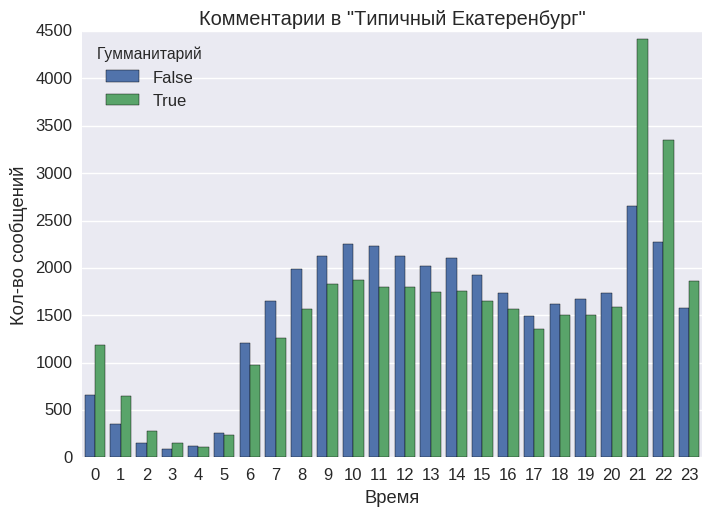

In [77]:
sns.set(font_scale=1.2)
g = sns.countplot(x='hour', hue='Гумманитарий', data=merged_, saturation=0.9)
g.set_ylabel('Кол-во сообщений')
g.set_xlabel('Время')
plt.title('Комментарии в "Типичный Екатеренбург"')


## Another

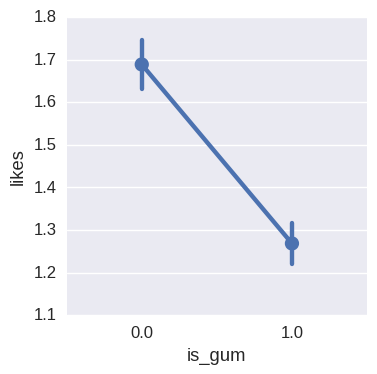

In [78]:
sns.factorplot(x='is_gum', y='likes', data=merged_)

## Saving

In [79]:
index_to_del = comments_merged[comments_merged.text == ''].index
comments_merged.drop(index_to_del, inplace=True)
comments_merged.shape

(98852, 14)

In [80]:
comments_merged[['from_id', 'text', 'is_gum', 'hour', 'likes', 'sex']].to_csv('data/comments_ekb.csv.gz',
                                                                       index=False, compression='gzip')